# Mushroom classification

variable doc:

[ https://www.kaggle.com/datasets/uciml/mushroom-classification ]  
[ https://archive.ics.uci.edu/ml/datasets/Mushroom ]


In [1]:
### library/modules = toolbox

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### load data
data = pd.read_csv('mushrooms.csv')


In [3]:
### data preview
display(data.head(3))
data.tail(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


# EDA : Exploratiory Data Analysis

understand & interpret the data+metadata 

In [30]:
# poisonous - editible mushrooms

## 1. Format-analysis

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [32]:
def give_INFO(data):
    INFO = pd.concat(
        [data.dtypes, data.nunique(), data.isnull().sum()],
        axis=1
    ) 
    INFO = INFO.rename(columns={
                            0:'dtypes',
                            1:'nuniques', # amount of possible values , 'cardinality' of variable
                            2:'isna_sum'}) # amount of null values
    
    return INFO


In [33]:
INFO = give_INFO(data)
INFO

,dtypes,nuniques,isna_sum
class,object,2,0
cap-shape,object,6,0
cap-surface,object,4,0
cap-color,object,10,0
bruises,object,2,0
odor,object,9,0
gill-attachment,object,2,0
gill-spacing,object,2,0
gill-size,object,2,0
gill-color,object,12,0


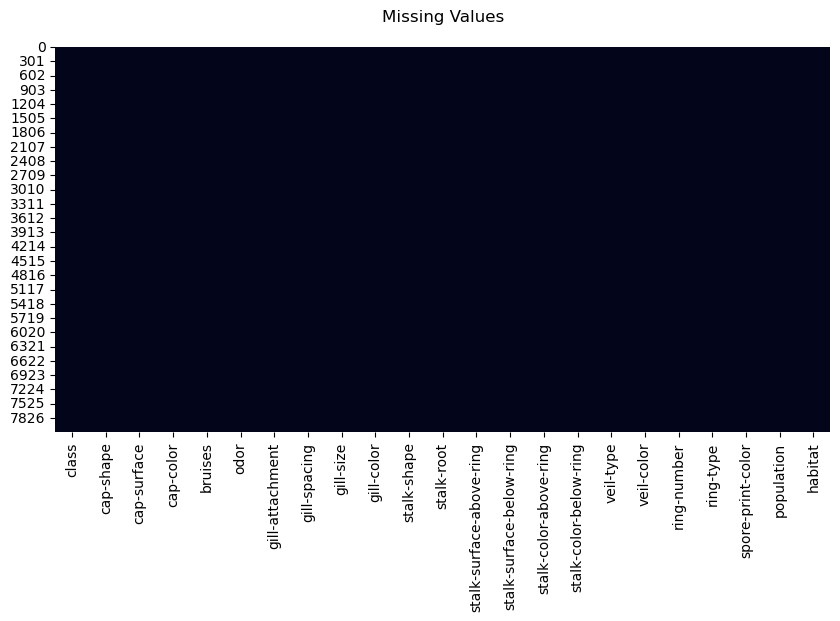

-------------------------------------------------- 
 missing value counts


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [34]:
plt.figure(figsize=(10, 5))

plt.title('Missing Values\n')

sns.heatmap(data.isnull(), cbar=False)
plt.show()
print('-'*50,'\n','missing value counts')
display(data.isnull().sum())

## 2. Univariate content-analysis
### 2.a. Target analysis


In [4]:
### referencing for systematic use of this template
target = 'class'

In [5]:
data[target].unique()

array(['p', 'e'], dtype=object)

In [6]:
target_map_ = {'e':'edible','p':'poisonous'}
#data[target] = data[target].map(target_map_)

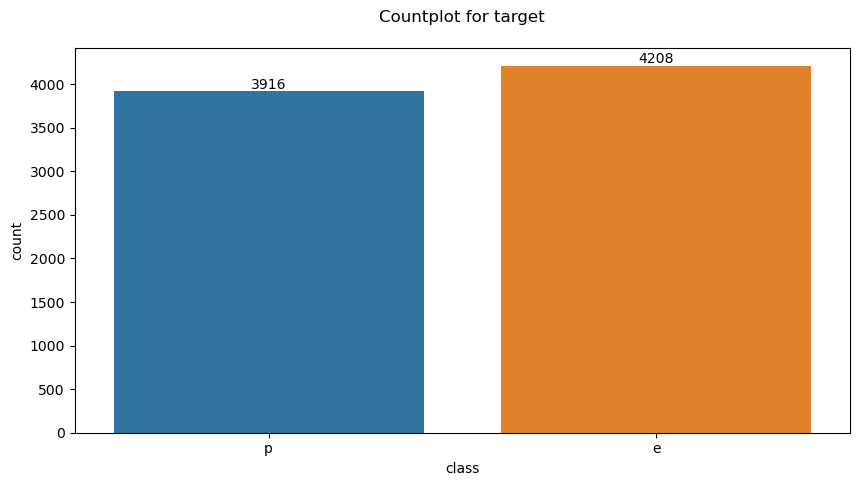

------------------------------
values :
e    4208
p    3916
Name: class, dtype: int64
------------------------------
ratios :
e    0.517971
p    0.482029
Name: class, dtype: float64


In [7]:
### recommendations:
### if the column is a categorical variable: -> barplot for visualisation
### if the column is a numerical variable: -> histogram for visualisation




plt.figure(figsize=(10, 5))
plt.title('Countplot for target\n')

ax = sns.countplot(data=data, x=target) # countplot = barplot, count

### show the data-labels for each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()



### show same info but in a table/list/series

val_counts = data[target].value_counts()
total_target= data[target].count()

print('-'*30)
print(f'values :\n{val_counts}')

print('-'*30)
print(f'ratios :\n{val_counts/total_target}')


In [8]:
### elementary statistics

data[[target]].describe()

,class
count,8124
unique,2
top,e
freq,4208


### 2.b. Features analysis: setup

features == explicative columns

In [10]:
feat_cols = data.columns.to_list() 
feat_cols.remove(target)
feat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [11]:
### CRITICAL USER INPUT

### segregation of features into relevant groups of statistical variables

### ordinal_categorical
ord_cols = [] 

### nominal_categorical
nom_cols = feat_cols

### all_categorical together
cat_cols = ord_cols + nom_cols 

### all numerical = all_features - all_categorical
num_cols = feat_cols.copy() 
for col in cat_cols:
    #print(col)
    num_cols.remove(col)


In [12]:
num_cols

[]

### cleanup for definition of categorical values

In [13]:
defs_feat = pd.read_csv('mushrooms_attributes.csv',sep='\.|:',engine='python', header=None)
#display(defs_feat)
defs_feat.replace(to_replace='bruises\?', value='bruises', regex=True,inplace=True)
defs_feat.replace(to_replace=' ', value='', regex=True,inplace=True)
defs_feat.set_index(0,inplace=True)
defs_feat.set_index(1,inplace=True)
display(defs_feat)

,2
1,
cap-shape,"bell=b,conical=c,convex=x,flat=f,knobbed=k,sun..."
cap-surface,"fibrous=f,grooves=g,scaly=y,smooth=s"
cap-color,"brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=..."
bruises,"bruises=t,no=f"
odor,"almond=a,anise=l,creosote=c,fishy=y,foul=f,mus..."
gill-attachment,"attached=a,descending=d,free=f,notched=n"
gill-spacing,"close=c,crowded=w,distant=d"
gill-size,"broad=b,narrow=n"
gill-color,"black=k,brown=n,buff=b,chocolate=h,gray=g,gree..."


In [14]:
import re
def sep_to_lists(row, splits = [',']):
    lst0 = [row]
    #L = []
    #print('lst',lst0)
    for i,sep in enumerate(splits):
        #print('sep',sep)
        L = []
        for j,el in enumerate(lst0):
            #print('el',el)
            lst0 = re.split(pattern=sep,string=el)
            #print('lst',lst0)
            L.append(lst0)
    return L


def make_dicts(row):
    D = {}
    for i,el in enumerate(row):
        D[el[1]]= el[0]
    return D


In [15]:
temp = defs_feat[2].apply(sep_to_lists,splits=[',','='])
temp

1
cap-shape                   [[bell, b], [conical, c], [convex, x], [flat, ...
cap-surface                 [[fibrous, f], [grooves, g], [scaly, y], [smoo...
cap-color                   [[brown, n], [buff, b], [cinnamon, c], [gray, ...
bruises                                               [[bruises, t], [no, f]]
odor                        [[almond, a], [anise, l], [creosote, c], [fish...
gill-attachment             [[attached, a], [descending, d], [free, f], [n...
gill-spacing                         [[close, c], [crowded, w], [distant, d]]
gill-size                                           [[broad, b], [narrow, n]]
gill-color                  [[black, k], [brown, n], [buff, b], [chocolate...
stalk-shape                                   [[enlarging, e], [tapering, t]]
stalk-root                  [[bulbous, b], [club, c], [cup, u], [equal, e]...
stalk-surface-above-ring    [[fibrous, f], [scaly, y], [silky, k], [smooth...
stalk-surface-below-ring    [[fibrous, f], [scaly, y], [silky,

In [16]:
temp2 = temp.apply(make_dicts)
temp2

1
cap-shape                   {'b': 'bell', 'c': 'conical', 'x': 'convex', '...
cap-surface                 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly',...
cap-color                   {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', '...
bruises                                           {'t': 'bruises', 'f': 'no'}
odor                        {'a': 'almond', 'l': 'anise', 'c': 'creosote',...
gill-attachment             {'a': 'attached', 'd': 'descending', 'f': 'fre...
gill-spacing                   {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill-size                                       {'b': 'broad', 'n': 'narrow'}
gill-color                  {'k': 'black', 'n': 'brown', 'b': 'buff', 'h':...
stalk-shape                               {'e': 'enlarging', 't': 'tapering'}
stalk-root                  {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e':...
stalk-surface-above-ring    {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', '...
stalk-surface-below-ring    {'f': 'fibrous', 'y': 'scaly', 'k'

In [38]:
temp2.to_json('feat_dicts.json')

In [17]:
temp3 = pd.concat([temp2, pd.Series(data= [target_map_], index=[target],)])
temp3

cap-shape                   {'b': 'bell', 'c': 'conical', 'x': 'convex', '...
cap-surface                 {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly',...
cap-color                   {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', '...
bruises                                           {'t': 'bruises', 'f': 'no'}
odor                        {'a': 'almond', 'l': 'anise', 'c': 'creosote',...
gill-attachment             {'a': 'attached', 'd': 'descending', 'f': 'fre...
gill-spacing                   {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill-size                                       {'b': 'broad', 'n': 'narrow'}
gill-color                  {'k': 'black', 'n': 'brown', 'b': 'buff', 'h':...
stalk-shape                               {'e': 'enlarging', 't': 'tapering'}
stalk-root                  {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e':...
stalk-surface-above-ring    {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', '...
stalk-surface-below-ring    {'f': 'fibrous', 'y': 'scaly', 'k': 

In [18]:
temp3['stalk-root']

{'b': 'bulbous',
 'c': 'club',
 'u': 'cup',
 'e': 'equal',
 'z': 'rhizomorphs',
 'r': 'rooted',
 '?': 'missing'}

In [20]:
data2 = data.copy()
data_ = data.copy()
for col in data2.columns:
    data2[col] = data2[col].map(temp3[col])
    
display(data2.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [21]:
data2['stalk-root']

0         equal
1          club
2          club
3         equal
4         equal
         ...   
8119    missing
8120    missing
8121    missing
8122    missing
8123    missing
Name: stalk-root, Length: 8124, dtype: object

In [22]:
data = data2.copy()

### 2.c. Categorical features

In [23]:
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

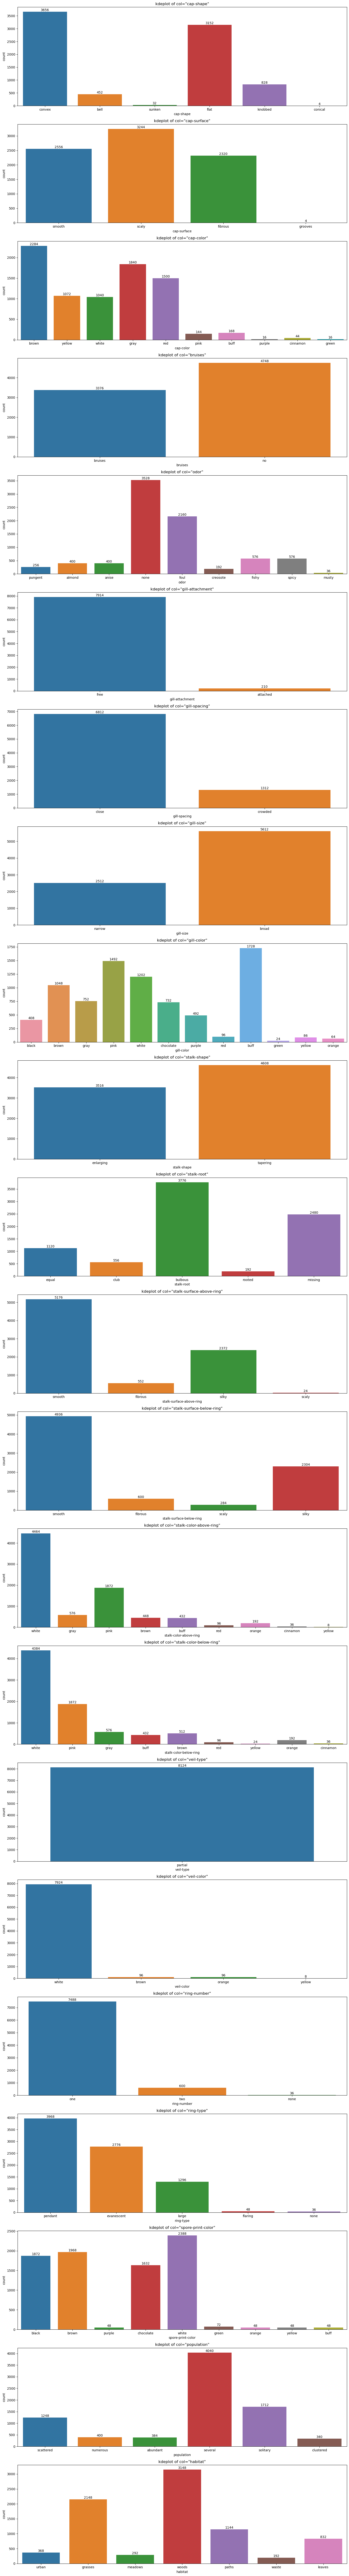

In [24]:
### number of numerical features
N_cat = len(cat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_cat)) 

### for each categorical feature plot a 'countplot'
for i in np.arange(N_cat):
    col = cat_cols[i]
    
    plt.subplot(N_cat, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### countplot
    ax = sns.countplot(data=data, x=col) 
    ### show the data-labels for each bar
    for container in ax.containers:
        ax.bar_label(container)
        
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [25]:
display(data[cat_cols].astype('category').describe().T)

,count,unique,top,freq
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728
stalk-shape,8124,2,tapering,4608


In [26]:
a = np.array(list('ABC'))
b = np.full_like(a=a,fill_value='_')
c = np.char.add(a,b)

In [27]:


upd_cols= nom_cols

temp = np.full_like(a=upd_cols,fill_value='_')

temp = pd.get_dummies(data[upd_cols]
                      ,prefix=np.char.add(np.array(upd_cols),temp)
                     )

data2 = data.drop(columns=upd_cols)
data2 = pd.concat([data2,temp], axis =1)

ord_cols2 = ord_cols.copy()
nom_cols2 = nom_cols.copy()
num_cols2 = num_cols.copy()

for col in upd_cols:
    nom_cols2.remove(col)
    
for col in temp.columns:
    nom_cols2.append(col)

    
cat_cols2 = ord_cols2+nom_cols2

In [28]:
temp.columns

Index(['cap-shape__bell', 'cap-shape__conical', 'cap-shape__convex',
       'cap-shape__flat', 'cap-shape__knobbed', 'cap-shape__sunken',
       'cap-surface__fibrous', 'cap-surface__grooves', 'cap-surface__scaly',
       'cap-surface__smooth',
       ...
       'population__scattered', 'population__several', 'population__solitary',
       'habitat__grasses', 'habitat__leaves', 'habitat__meadows',
       'habitat__paths', 'habitat__urban', 'habitat__waste', 'habitat__woods'],
      dtype='object', length=117)

In [29]:
temp

,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,cap-surface__smooth,...,population__scattered,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [30]:
data2[cat_cols2]

,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,cap-surface__smooth,...,population__scattered,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8122,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


### 2.d. Numerical features

In [31]:
num_cols

[]

In [32]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram
    sns.histplot(data=data, x=col
                      , fill=True
                      , element="step"
                      , stat = 'count' # 'count','density','percent', ...
                      , discrete=False
                      , kde=True
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

<Figure size 1500x0 with 0 Axes>

In [62]:
#display(data[num_cols].describe().T)

## 3. Bivariate content analysis: features vs target


## 3.a.  Categorical vs target


recommendations:  
__feature vs target:__
- _categorical vs categorical:_  
        barplot/countplot of feature,  
        color/hue based on target values  
        
        groupby(target)

- _categorical vs numerical:_  
        histogram of target,  
        color/hue based on feature   
        
        groupby(feature)

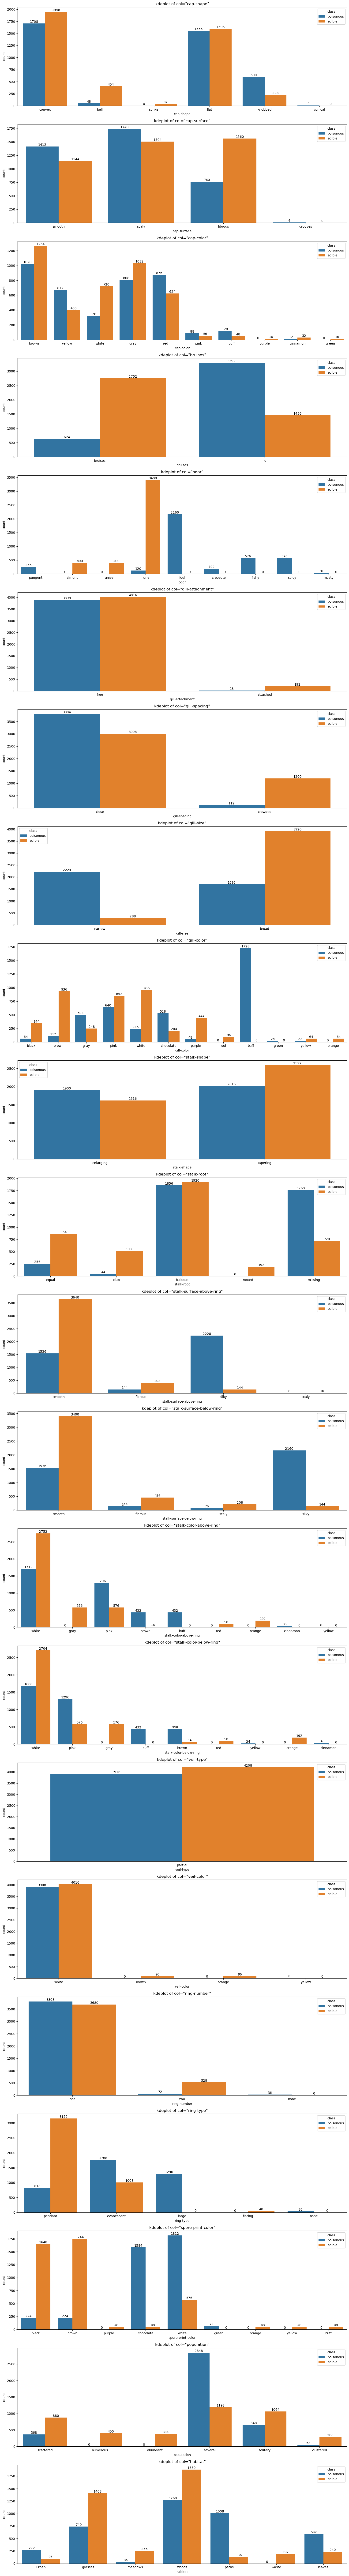

In [33]:
### number of numerical features
N_cat = len(cat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_cat)) 

### for each categorical feature plot a 'countplot'
for i in np.arange(N_cat):
    col = cat_cols[i]
    
    plt.subplot(N_cat, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### countplot
    ax = sns.countplot(data=data, x=col, hue=target) 
    ### show the data-labels for each bar
    for container in ax.containers:
        ax.bar_label(container)
        
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [34]:
### groupby-statistics

for col in cat_cols2:
    display(data2[[col,target]].astype('category').groupby(target).describe())

cap-shape__bell                 
                    count unique top  freq
class                                     
edible               4208      2   0  3804
poisonous            3916      2   0  3868

cap-shape__conical                 
                       count unique top  freq
class                                        
edible                  4208      1   0  4208
poisonous               3916      2   0  3912

cap-shape__convex                 
                      count unique top  freq
class                                       
edible                 4208      2   0  2260
poisonous              3916      2   0  2208

cap-shape__flat                 
                    count unique top  freq
class                                     
edible               4208      2   0  2612
poisonous            3916      2   0  2360

cap-shape__knobbed                 
                       count unique top  freq
class                                        
edible                  4208      2   0  3980
poisonous               3916      2   0  3316

cap-shape__sunken                 
                      count unique top  freq
class                                       
edible                 4208      2   0  4176
poisonous              3916      1   0  3916

cap-surface__fibrous                 
                         count unique top  freq
class                                          
edible                    4208      2   0  2648
poisonous                 3916      2   0  3156

cap-surface__grooves                 
                         count unique top  freq
class                                          
edible                    4208      1   0  4208
poisonous                 3916      2   0  3912

cap-surface__scaly                 
                       count unique top  freq
class                                        
edible                  4208      2   0  2704
poisonous               3916      2   0  2176

cap-surface__smooth                 
                        count unique top  freq
class                                         
edible                   4208      2   0  3064
poisonous                3916      2   0  2504

cap-color__brown                 
                     count unique top  freq
class                                      
edible                4208      2   0  2944
poisonous             3916      2   0  2896

cap-color__buff                 
                    count unique top  freq
class                                     
edible               4208      2   0  4160
poisonous            3916      2   0  3796

cap-color__cinnamon                 
                        count unique top  freq
class                                         
edible                   4208      2   0  4176
poisonous                3916      2   0  3904

cap-color__gray                 
                    count unique top  freq
class                                     
edible               4208      2   0  3176
poisonous            3916      2   0  3108

cap-color__green                 
                     count unique top  freq
class                                      
edible                4208      2   0  4192
poisonous             3916      1   0  3916

cap-color__pink                 
                    count unique top  freq
class                                     
edible               4208      2   0  4152
poisonous            3916      2   0  3828

cap-color__purple                 
                      count unique top  freq
class                                       
edible                 4208      2   0  4192
poisonous              3916      1   0  3916

cap-color__red                 
                   count unique top  freq
class                                    
edible              4208      2   0  3584
poisonous           3916      2   0  3040

cap-color__white                 
                     count unique top  freq
class                                      
edible                4208      2   0  3488
poisonous             3916      2   0  3596

cap-color__yellow                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3808
poisonous              3916      2   0  3244

bruises__bruises                 
                     count unique top  freq
class                                      
edible                4208      2   1  2752
poisonous             3916      2   0  3292

bruises__no                 
                count unique top  freq
class                                 
edible           4208      2   0  2752
poisonous        3916      2   1  3292

odor__almond                 
                 count unique top  freq
class                                  
edible            4208      2   0  3808
poisonous         3916      1   0  3916

odor__anise                 
                count unique top  freq
class                                 
edible           4208      2   0  3808
poisonous        3916      1   0  3916

odor__creosote                 
                   count unique top  freq
class                                    
edible              4208      1   0  4208
poisonous           3916      2   0  3724

odor__fishy                 
                count unique top  freq
class                                 
edible           4208      1   0  4208
poisonous        3916      2   0  3340

odor__foul                 
               count unique top  freq
class                                
edible          4208      1   0  4208
poisonous       3916      2   1  2160

odor__musty                 
                count unique top  freq
class                                 
edible           4208      1   0  4208
poisonous        3916      2   0  3880

odor__none                 
               count unique top  freq
class                                
edible          4208      2   1  3408
poisonous       3916      2   0  3796

odor__pungent                 
                  count unique top  freq
class                                   
edible             4208      1   0  4208
poisonous          3916      2   0  3660

odor__spicy                 
                count unique top  freq
class                                 
edible           4208      1   0  4208
poisonous        3916      2   0  3340

gill-attachment__attached                 
                              count unique top  freq
class                                               
edible                         4208      2   0  4016
poisonous                      3916      2   0  3898

gill-attachment__free                 
                          count unique top  freq
class                                           
edible                     4208      2   1  4016
poisonous                  3916      2   1  3898

gill-spacing__close                 
                        count unique top  freq
class                                         
edible                   4208      2   1  3008
poisonous                3916      2   1  3804

gill-spacing__crowded                 
                          count unique top  freq
class                                           
edible                     4208      2   0  3008
poisonous                  3916      2   0  3804

gill-size__broad                 
                     count unique top  freq
class                                      
edible                4208      2   1  3920
poisonous             3916      2   0  2224

gill-size__narrow                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3920
poisonous              3916      2   1  2224

gill-color__black                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3864
poisonous              3916      2   0  3852

gill-color__brown                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3272
poisonous              3916      2   0  3804

gill-color__buff                 
                     count unique top  freq
class                                      
edible                4208      1   0  4208
poisonous             3916      2   0  2188

gill-color__chocolate                 
                          count unique top  freq
class                                           
edible                     4208      2   0  4004
poisonous                  3916      2   0  3388

gill-color__gray                 
                     count unique top  freq
class                                      
edible                4208      2   0  3960
poisonous             3916      2   0  3412

gill-color__green                 
                      count unique top  freq
class                                       
edible                 4208      1   0  4208
poisonous              3916      2   0  3892

gill-color__orange                 
                       count unique top  freq
class                                        
edible                  4208      2   0  4144
poisonous               3916      1   0  3916

gill-color__pink                 
                     count unique top  freq
class                                      
edible                4208      2   0  3356
poisonous             3916      2   0  3276

gill-color__purple                 
                       count unique top  freq
class                                        
edible                  4208      2   0  3764
poisonous               3916      2   0  3868

gill-color__red                 
                    count unique top  freq
class                                     
edible               4208      2   0  4112
poisonous            3916      1   0  3916

gill-color__white                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3252
poisonous              3916      2   0  3670

gill-color__yellow                 
                       count unique top  freq
class                                        
edible                  4208      2   0  4144
poisonous               3916      2   0  3894

stalk-shape__enlarging                 
                           count unique top  freq
class                                            
edible                      4208      2   0  2592
poisonous                   3916      2   0  2016

stalk-shape__tapering                 
                          count unique top  freq
class                                           
edible                     4208      2   1  2592
poisonous                  3916      2   1  2016

stalk-root__bulbous                 
                        count unique top  freq
class                                         
edible                   4208      2   0  2288
poisonous                3916      2   0  2060

stalk-root__club                 
                     count unique top  freq
class                                      
edible                4208      2   0  3696
poisonous             3916      2   0  3872

stalk-root__equal                 
                      count unique top  freq
class                                       
edible                 4208      2   0  3344
poisonous              3916      2   0  3660

stalk-root__missing                 
                        count unique top  freq
class                                         
edible                   4208      2   0  3488
poisonous                3916      2   0  2156

stalk-root__rooted                 
                       count unique top  freq
class                                        
edible                  4208      2   0  4016
poisonous               3916      1   0  3916

stalk-surface-above-ring__fibrous                 
                                      count unique top  freq
class                                                       
edible                                 4208      2   0  3800
poisonous                              3916      2   0  3772

stalk-surface-above-ring__scaly                 
                                    count unique top  freq
class                                                     
edible                               4208      2   0  4192
poisonous                            3916      2   0  3908

stalk-surface-above-ring__silky                 
                                    count unique top  freq
class                                                     
edible                               4208      2   0  4064
poisonous                            3916      2   1  2228

stalk-surface-above-ring__smooth                 
                                     count unique top  freq
class                                                      
edible                                4208      2   1  3640
poisonous                             3916      2   0  2380

stalk-surface-below-ring__fibrous                 
                                      count unique top  freq
class                                                       
edible                                 4208      2   0  3752
poisonous                              3916      2   0  3772

stalk-surface-below-ring__scaly                 
                                    count unique top  freq
class                                                     
edible                               4208      2   0  4000
poisonous                            3916      2   0  3840

stalk-surface-below-ring__silky                 
                                    count unique top  freq
class                                                     
edible                               4208      2   0  4064
poisonous                            3916      2   1  2160

stalk-surface-below-ring__smooth                 
                                     count unique top  freq
class                                                      
edible                                4208      2   1  3400
poisonous                             3916      2   0  2380

stalk-color-above-ring__brown                 
                                  count unique top  freq
class                                                   
edible                             4208      2   0  4192
poisonous                          3916      2   0  3484

stalk-color-above-ring__buff                 
                                 count unique top  freq
class                                                  
edible                            4208      1   0  4208
poisonous                         3916      2   0  3484

stalk-color-above-ring__cinnamon                 
                                     count unique top  freq
class                                                      
edible                                4208      1   0  4208
poisonous                             3916      2   0  3880

stalk-color-above-ring__gray                 
                                 count unique top  freq
class                                                  
edible                            4208      2   0  3632
poisonous                         3916      1   0  3916

stalk-color-above-ring__orange                 
                                   count unique top  freq
class                                                    
edible                              4208      2   0  4016
poisonous                           3916      1   0  3916

stalk-color-above-ring__pink                 
                                 count unique top  freq
class                                                  
edible                            4208      2   0  3632
poisonous                         3916      2   0  2620

stalk-color-above-ring__red                 
                                count unique top  freq
class                                                 
edible                           4208      2   0  4112
poisonous                        3916      1   0  3916

stalk-color-above-ring__white                 
                                  count unique top  freq
class                                                   
edible                             4208      2   1  2752
poisonous                          3916      2   0  2204

stalk-color-above-ring__yellow                 
                                   count unique top  freq
class                                                    
edible                              4208      1   0  4208
poisonous                           3916      2   0  3908

stalk-color-below-ring__brown                 
                                  count unique top  freq
class                                                   
edible                             4208      2   0  4144
poisonous                          3916      2   0  3468

stalk-color-below-ring__buff                 
                                 count unique top  freq
class                                                  
edible                            4208      1   0  4208
poisonous                         3916      2   0  3484

stalk-color-below-ring__cinnamon                 
                                     count unique top  freq
class                                                      
edible                                4208      1   0  4208
poisonous                             3916      2   0  3880

stalk-color-below-ring__gray                 
                                 count unique top  freq
class                                                  
edible                            4208      2   0  3632
poisonous                         3916      1   0  3916

stalk-color-below-ring__orange                 
                                   count unique top  freq
class                                                    
edible                              4208      2   0  4016
poisonous                           3916      1   0  3916

stalk-color-below-ring__pink                 
                                 count unique top  freq
class                                                  
edible                            4208      2   0  3632
poisonous                         3916      2   0  2620

stalk-color-below-ring__red                 
                                count unique top  freq
class                                                 
edible                           4208      2   0  4112
poisonous                        3916      1   0  3916

stalk-color-below-ring__white                 
                                  count unique top  freq
class                                                   
edible                             4208      2   1  2704
poisonous                          3916      2   0  2236

stalk-color-below-ring__yellow                 
                                   count unique top  freq
class                                                    
edible                              4208      1   0  4208
poisonous                           3916      2   0  3892

veil-type__partial                 
                       count unique top  freq
class                                        
edible                  4208      1   1  4208
poisonous               3916      1   1  3916

veil-color__brown                 
                      count unique top  freq
class                                       
edible                 4208      2   0  4112
poisonous              3916      1   0  3916

veil-color__orange                 
                       count unique top  freq
class                                        
edible                  4208      2   0  4112
poisonous               3916      1   0  3916

veil-color__white                 
                      count unique top  freq
class                                       
edible                 4208      2   1  4016
poisonous              3916      2   1  3908

veil-color__yellow                 
                       count unique top  freq
class                                        
edible                  4208      1   0  4208
poisonous               3916      2   0  3908

ring-number__none                 
                      count unique top  freq
class                                       
edible                 4208      1   0  4208
poisonous              3916      2   0  3880

ring-number__one                 
                     count unique top  freq
class                                      
edible                4208      2   1  3680
poisonous             3916      2   1  3808

ring-number__two                 
                     count unique top  freq
class                                      
edible                4208      2   0  3680
poisonous             3916      2   0  3844

ring-type__evanescent                 
                          count unique top  freq
class                                           
edible                     4208      2   0  3200
poisonous                  3916      2   0  2148

ring-type__flaring                 
                       count unique top  freq
class                                        
edible                  4208      2   0  4160
poisonous               3916      1   0  3916

ring-type__large                 
                     count unique top  freq
class                                      
edible                4208      1   0  4208
poisonous             3916      2   0  2620

ring-type__none                 
                    count unique top  freq
class                                     
edible               4208      1   0  4208
poisonous            3916      2   0  3880

ring-type__pendant                 
                       count unique top  freq
class                                        
edible                  4208      2   1  3152
poisonous               3916      2   0  3100

spore-print-color__black                 
                             count unique top  freq
class                                              
edible                        4208      2   0  2560
poisonous                     3916      2   0  3692

spore-print-color__brown                 
                             count unique top  freq
class                                              
edible                        4208      2   0  2464
poisonous                     3916      2   0  3692

spore-print-color__buff                 
                            count unique top  freq
class                                             
edible                       4208      2   0  4160
poisonous                    3916      1   0  3916

spore-print-color__chocolate                 
                                 count unique top  freq
class                                                  
edible                            4208      2   0  4160
poisonous                         3916      2   0  2332

spore-print-color__green                 
                             count unique top  freq
class                                              
edible                        4208      1   0  4208
poisonous                     3916      2   0  3844

spore-print-color__orange                 
                              count unique top  freq
class                                               
edible                         4208      2   0  4160
poisonous                      3916      1   0  3916

spore-print-color__purple                 
                              count unique top  freq
class                                               
edible                         4208      2   0  4160
poisonous                      3916      1   0  3916

spore-print-color__white                 
                             count unique top  freq
class                                              
edible                        4208      2   0  3632
poisonous                     3916      2   0  2104

spore-print-color__yellow                 
                              count unique top  freq
class                                               
edible                         4208      2   0  4160
poisonous                      3916      1   0  3916

population__abundant                 
                         count unique top  freq
class                                          
edible                    4208      2   0  3824
poisonous                 3916      1   0  3916

population__clustered                 
                          count unique top  freq
class                                           
edible                     4208      2   0  3920
poisonous                  3916      2   0  3864

population__numerous                 
                         count unique top  freq
class                                          
edible                    4208      2   0  3808
poisonous                 3916      1   0  3916

population__scattered                 
                          count unique top  freq
class                                           
edible                     4208      2   0  3328
poisonous                  3916      2   0  3548

population__several                 
                        count unique top  freq
class                                         
edible                   4208      2   0  3016
poisonous                3916      2   1  2848

population__solitary                 
                         count unique top  freq
class                                          
edible                    4208      2   0  3144
poisonous                 3916      2   0  3268

habitat__grasses                 
                     count unique top  freq
class                                      
edible                4208      2   0  2800
poisonous             3916      2   0  3176

habitat__leaves                 
                    count unique top  freq
class                                     
edible               4208      2   0  3968
poisonous            3916      2   0  3324

habitat__meadows                 
                     count unique top  freq
class                                      
edible                4208      2   0  3952
poisonous             3916      2   0  3880

habitat__paths                 
                   count unique top  freq
class                                    
edible              4208      2   0  4072
poisonous           3916      2   0  2908

habitat__urban                 
                   count unique top  freq
class                                    
edible              4208      2   0  4112
poisonous           3916      2   0  3644

habitat__waste                 
                   count unique top  freq
class                                    
edible              4208      2   0  4016
poisonous           3916      1   0  3916

habitat__woods                 
                   count unique top  freq
class                                    
edible              4208      2   0  2328
poisonous           3916      2   0  2648

## 3.b. Numerical vs target


recommendations:  
__feature vs target:__
- _numerical vs categorical:_  
        histogram of feature,  
        color/hue based on target 
        
        groupby(target)
    

- _numerical vs numerical:_  
        scatter/pair plot with 
        feature on x-axis, target on y-axis
        
        no groupby

## 3.c. Correlations

works only on numbers, not text

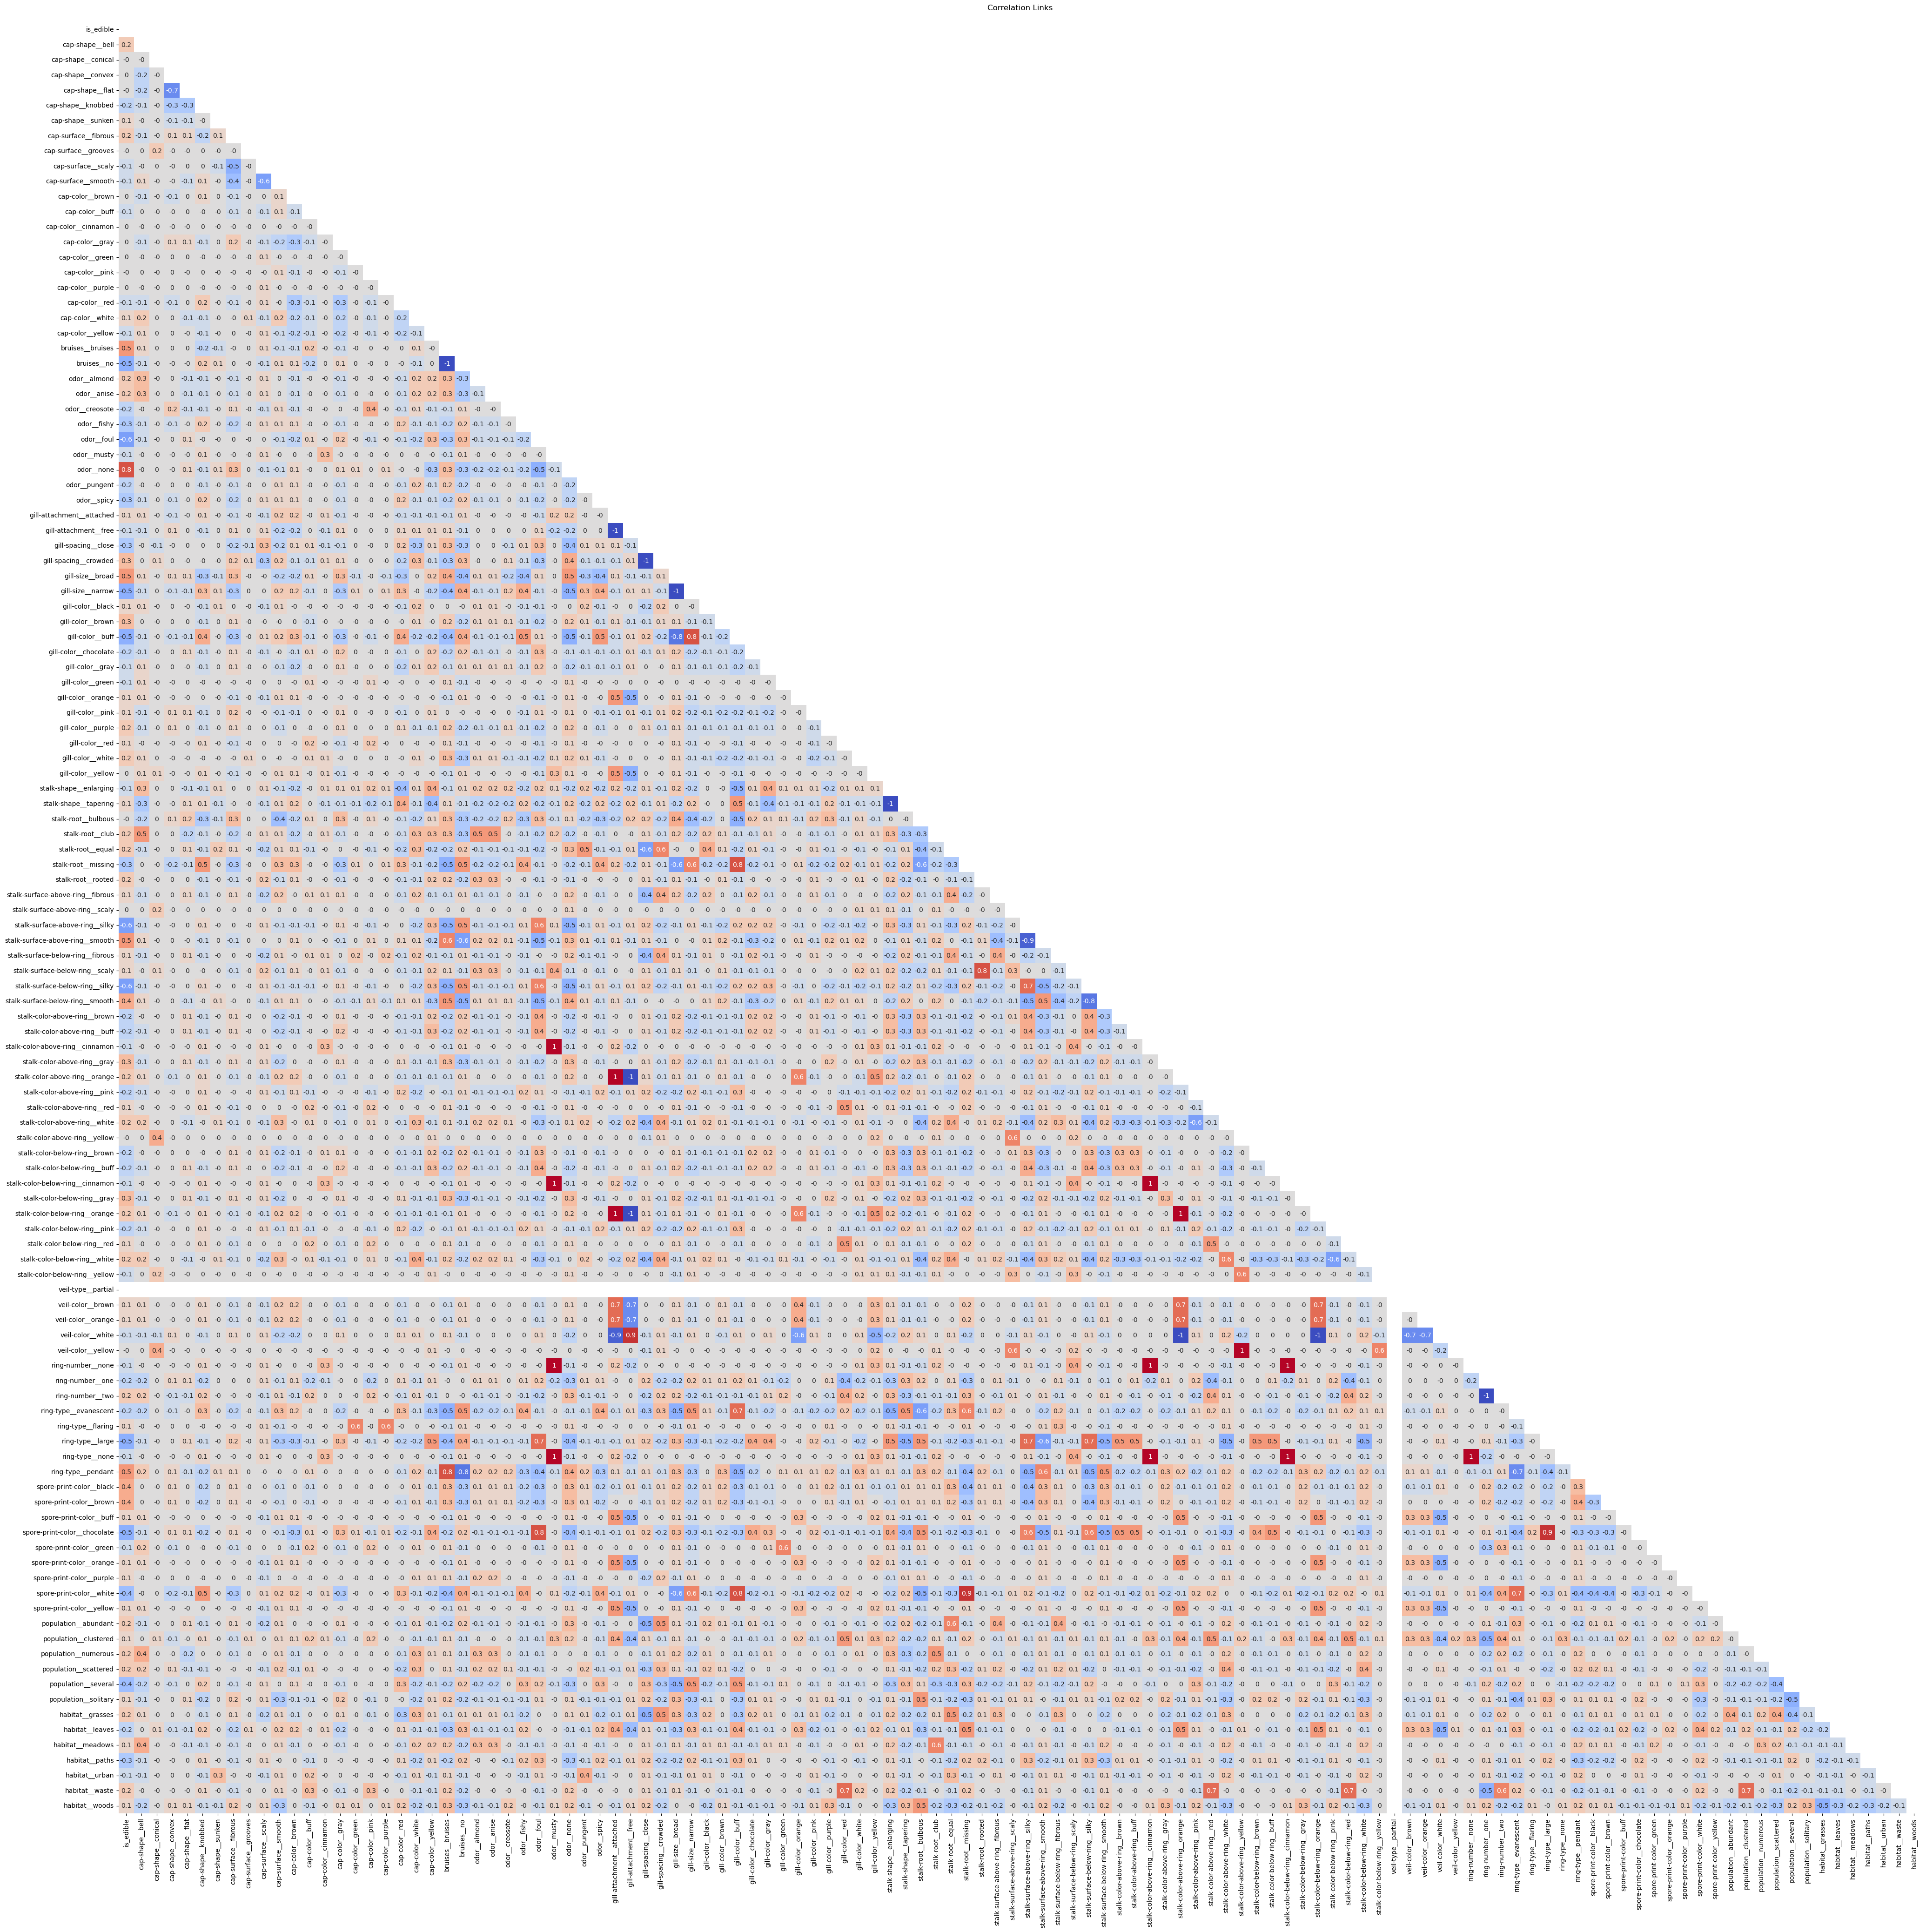

In [35]:
#data[[target]+feat_cols].corr()

data2['is_edible'] = data2['class']=='edible'

corr_ = data2[['is_edible']+cat_cols2].corr().round(1)
#display(corr_)

mask = np.triu(np.ones_like(corr_, dtype=bool))

### put the same info in a graph
plt.figure(figsize=(50, 50))
plt.title('Correlation Links\n')


### heatmap with symetric table
sns.heatmap(data = corr_,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True,
            mask=mask,
           )
plt.savefig('mushrooms_corr.pdf')
plt.show()

## 4. Multivariate content analysis
recommendations:

 - try pairplot where applicable
 - groupby where applicable

>there are no additional general recommendations,
    it depends mostly on context/meaning of the columns

# export relevant columns to csv :

In [36]:
data2.to_csv('mushrooms_eda.csv', index=False)

In [68]:
data2

,class,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,...,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods,is_edible
0,poisonous,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,False
1,edible,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
2,edible,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,True
3,poisonous,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,False
4,edible,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,True
8120,edible,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,True
8121,edible,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,True
8122,poisonous,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,False


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [69]:
data.columns.to_list()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [70]:
data_ = data.copy()
data_['is_edible'] = data_['class'] == 'edible'

In [75]:
GB = data_.groupby(['odor','gill-color',]).agg({'is_edible':['sum','count']})
GB.columns = ['is_e_sum','is_e_count']
GB = GB.reset_index()

In [78]:
GB['ratio'] = GB['is_e_sum'] / GB['is_e_count']

In [80]:
GB.sort_values(by='ratio',ascending=False)

,odor,gill-color,is_e_sum,is_e_count,ratio
0,almond,black,64,64,1.000000
9,anise,white,112,112,1.000000
23,none,brown,712,712,1.000000
22,none,black,216,216,1.000000
27,none,orange,64,64,1.000000
1,almond,brown,112,112,1.000000
28,none,pink,756,756,1.000000
29,none,purple,444,444,1.000000
30,none,red,96,96,1.000000
24,none,chocolate,204,204,1.000000
